# MobileWell400+

## Data Analaysis on Sensor Statistics, and Stress vs Activity comparison

### Concepts Covered:
### 1) Data Preprocessing
### 2) Descriptive Analytics
### 3) Hypothesis Testing (Only t-tests)

### Files Available:
### 1) activity_recognition.csv
### 2) wifi.csv
### 3) connectivity.csv
### 4) light.csv
### 5) noise.csv
### 6) screen.csv
### 7) initial_survey.csv
### 8) daily_survey.csv
### 9) weekly_survey.csv
### 10) final_survey.csv

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox

# Part 1: Computing Sensor Statistics

# Data Exploration and Preprocessing

In [3]:
file_loc = "MobileWell400+/"

## Extracting Sensor Data

In [4]:
activity_data = pd.read_csv(f"{file_loc}activity_recognition.csv")
connectivity_data = pd.read_csv(f"{file_loc}connectivity.csv")
light_data = pd.read_csv(f"{file_loc}light.csv")
noise_data = pd.read_csv(f"{file_loc}noise.csv")
screen_data = pd.read_csv(f"{file_loc}screen.csv")

sensors = [activity_data, connectivity_data, light_data, noise_data, screen_data]

In [5]:
# Displaying Info of data
for i in sensors:
    print(f"{i.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10045512 entries, 0 to 10045511
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   participant    object 
 1   timestamp      object 
 2   label          object 
 3   confidence     int64  
 4   timestamp_UTC  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 383.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146059 entries, 0 to 146058
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   participant          146059 non-null  object 
 1   timestamp            146059 non-null  object 
 2   connectivity_status  146059 non-null  object 
 3   timestamp_UTC        146059 non-null  float64
dtypes: float64(1), object(3)
memory usage: 4.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345973 entries, 0 to 1345972
Data columns (total 8 columns):
 #   Column         Non-Null Count  

In [6]:
# Checking for null and duplicated values
for i in sensors:
    print(f"{i.isnull().sum()}")
    print(f"{i.duplicated().sum()}")

participant      0
timestamp        0
label            0
confidence       0
timestamp_UTC    0
dtype: int64
0
participant            0
timestamp              0
connectivity_status    0
timestamp_UTC          0
dtype: int64
0
participant      0
timestamp        0
max_lux          0
min_lux          0
std_lux          0
mean_lux         0
num_samples      0
timestamp_UTC    0
dtype: int64
0
participant      0
timestamp        0
max_decibel      0
min_decibel      0
std_decibel      0
mean_decibel     0
num_samples      0
timestamp_UTC    0
dtype: int64
0
participant      0
timestamp        0
screen_event     0
timestamp_UTC    0
dtype: int64
0


Reasons for dropping wifi_data.csv
1) Consists of ssid and bssid of the network device that the user's device connected to, which is potentially of no use for us in determining the user's geographical location.
2) Data is only about wifi and no other network options
3) 9400+ NULL values in both ssid and bssid which determines if the user's connected to wifi or not.
4) Redundant data since connectivity.csv already determines the type of connection under the attribute connectivity_status

In [7]:
# converting all timestamp to datetime format, dropping timestamp_UTC
for i in sensors:
    i.drop('timestamp_UTC', axis=1, inplace=True)
    i['timestamp'] = pd.to_datetime(i['timestamp'])

In [8]:
# Confirming the conversion of timestamp from float64 to datetime in seconds format
for i in sensors:
    print(f"{i["timestamp"].dtype}")

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [9]:
activity_data

,participant,timestamp,label,confidence
0,AMdzA,2023-07-11 06:53:11.008530,TILTING,100
1,AMdzA,2023-07-11 07:39:23.885206,UNKNOWN,40
2,AMdzA,2023-07-11 07:39:50.082418,TILTING,100
3,AMdzA,2023-07-11 07:45:18.476427,TILTING,100
4,AMdzA,2023-07-11 07:50:31.669694,TILTING,100
...,...,...,...,...
10045507,rsgrE,2023-08-08 20:52:16.386617,STILL,97
10045508,rsgrE,2023-08-08 20:52:31.636208,STILL,98
10045509,rsgrE,2023-08-08 20:52:36.709867,STILL,96
10045510,rsgrE,2023-08-08 20:52:57.063209,STILL,57


In [10]:
connectivity_data

,participant,timestamp,connectivity_status
0,AMdzA,2023-07-11 06:30:32.524594,mobile
1,AMdzA,2023-07-11 06:30:45.647064,wifi
2,AMdzA,2023-07-11 07:16:04.829937,none
3,AMdzA,2023-07-11 07:16:06.256565,mobile
4,AMdzA,2023-07-11 07:54:47.653846,none
...,...,...,...
146054,rsgrE,2023-08-08 19:19:12.664165,mobile
146055,rsgrE,2023-08-08 19:45:33.129225,mobile
146056,rsgrE,2023-08-08 19:45:33.139172,mobile
146057,rsgrE,2023-08-08 20:35:32.201523,none


In [11]:
light_data

,participant,timestamp,max_lux,min_lux,std_lux,mean_lux,num_samples
0,AMdzA,2023-07-11 06:36:42.026086,0,0,0.000000,0.000000,1
1,AMdzA,2023-07-11 06:40:43.454031,73,0,14.423165,53.842105,19
2,AMdzA,2023-07-11 06:46:50.492814,75,0,37.500000,37.500000,2
3,AMdzA,2023-07-11 06:52:52.595092,0,0,0.000000,0.000000,1
4,AMdzA,2023-07-11 06:57:33.660943,0,0,0.000000,0.000000,1
...,...,...,...,...,...,...,...
1345968,rsgrE,2023-08-08 20:27:45.767320,0,0,0.000000,0.000000,2
1345969,rsgrE,2023-08-08 20:33:21.773184,52,0,26.000000,26.000000,2
1345970,rsgrE,2023-08-08 20:38:25.927745,11,11,0.000000,11.000000,1
1345971,rsgrE,2023-08-08 20:43:26.757435,11,11,0.000000,11.000000,1


In [12]:
noise_data

,participant,timestamp,max_decibel,min_decibel,std_decibel,mean_decibel,num_samples
0,AMdzA,2023-07-12 09:58:50.683346,82.442616,75.669046,2.546522,78.773206,8
1,AMdzA,2023-07-12 22:45:28.086004,90.308999,57.443391,11.678699,73.681416,11
2,AMdzA,2023-07-15 10:10:53.897088,87.484597,81.643401,1.710924,84.183502,10
3,AMdzA,2023-07-15 16:17:19.739852,90.308999,71.728635,5.227986,85.624540,11
4,AMdzA,2023-07-16 16:02:16.085235,89.766766,71.079139,5.254087,82.704595,10
...,...,...,...,...,...,...,...
239793,rsgrE,2023-08-03 14:57:06.114863,61.938465,43.890552,5.611807,55.314803,12
239794,rsgrE,2023-08-04 09:21:50.945093,51.434442,35.343382,4.462267,39.718328,12
239795,rsgrE,2023-08-08 18:30:49.325847,67.078590,63.070465,1.132845,64.831749,12
239796,rsgrE,2023-08-08 19:19:21.384248,86.168992,72.998639,3.422628,79.070708,12


In [13]:
screen_data

,participant,timestamp,screen_event
0,AMdzA,2023-07-11 06:20:01.758140,SCREEN_ON
1,AMdzA,2023-07-11 06:20:31.715180,SCREEN_OFF
2,AMdzA,2023-07-11 06:30:02.199423,SCREEN_ON
3,AMdzA,2023-07-11 06:30:18.047585,SCREEN_OFF
4,AMdzA,2023-07-11 06:30:19.136981,SCREEN_ON
...,...,...,...
2133793,rsgrE,2023-08-08 20:35:59.538252,SCREEN_ON
2133794,rsgrE,2023-08-08 20:36:00.639186,SCREEN_UNLOCKED
2133795,rsgrE,2023-08-08 20:44:05.130012,SCREEN_OFF
2133796,rsgrE,2023-08-08 20:45:25.508168,SCREEN_ON


## Exploring Noise data

In [14]:
noise_data[['max_decibel', 'min_decibel', 'std_decibel', 'mean_decibel']].describe()

,max_decibel,min_decibel,std_decibel,mean_decibel
count,239798.000000,239798.000000,239798.000000,239798.000000
mean,61.397467,39.322289,6.228257,52.302468
std,16.687292,19.579931,4.776235,15.913271
min,0.000265,-6.020335,0.000000,-5.518618
25%,49.426099,24.349944,2.571682,39.697796
50%,61.993878,38.840426,5.058132,52.091959
75%,74.753658,53.909899,8.446883,64.636528
max,90.308999,90.309131,35.372456,90.309131


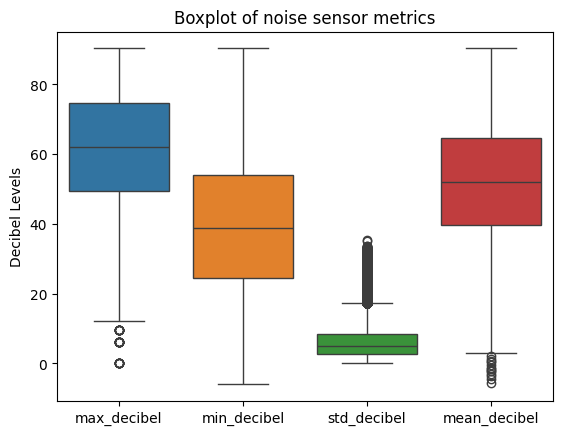

In [16]:
sns.boxplot(data=noise_data[['max_decibel', 'min_decibel', 'std_decibel', 'mean_decibel']])
plt.title("Boxplot of noise sensor metrics")
plt.ylabel("Decibel Levels")
plt.show()

Understanding above Boxplot

Noise Data: the boxplots confirm that the measured data is upto the standard. However there are certain cases where minimum decibel has fallen below the 0 mark. Although decibels are calculated logarithmically, it seems that due to improper device calibration, the negative values have appeared in the minimum decibel measured from the given samples. We can easily cap the min_lux, mean and std_dev of lux before applying normalization techniques.

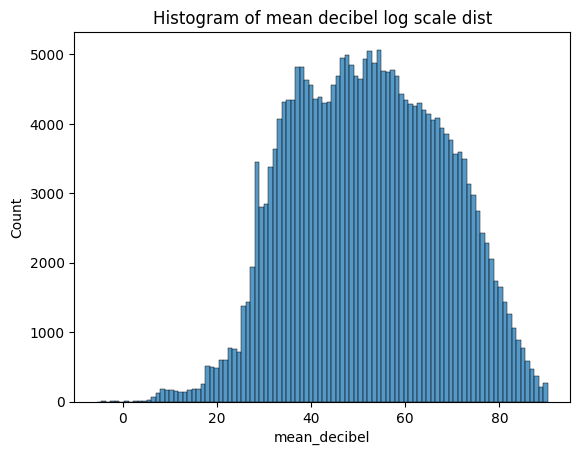

In [17]:
sns.histplot(noise_data['mean_decibel'], bins=100)
#plt.xscale('log')
plt.title("Histogram of mean decibel log scale dist")
plt.show()

In [18]:
print(f"Skewness of mean_decibel: {noise_data['mean_decibel'].skew()}")
print(f"Kurtosis of mean_decibel: {noise_data['mean_decibel'].kurtosis()}")

Skewness of mean_decibel: 0.0052857755548617325
Kurtosis of mean_decibel: -0.6796019773187081


In [19]:
# Capping negaive mean lux values to 0
noise_data['mean_decibel'] = noise_data['mean_decibel'].clip(lower = 0)

In [20]:
print(f"Skewness of mean_decibel after capping: {noise_data['mean_decibel'].skew()}")
print(f"Kurtosis of mean_decibel after capping: {noise_data['mean_decibel'].kurtosis()}")

Skewness of mean_decibel after capping: 0.005491219883431768
Kurtosis of mean_decibel after capping: -0.6804167977192774


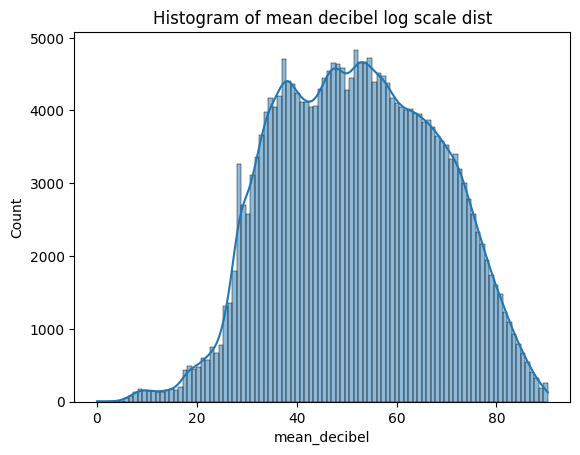

In [21]:
sns.histplot(noise_data['mean_decibel'], bins=100, kde=True)
#plt.xscale('log')
plt.title("Histogram of mean decibel log scale dist")
plt.show()

Interpretation of mean_decibel:

The data was originally consisting of certain values lesser than 0, however it was already realtively normal from the skewness and kurtosis values mentioned above. After capping the lower values to 0, the data is still relatively normal proven by the skewness and kurtosis values mentioned above.

Since our data is relatively normal, we can perform hypotheis testing with our data

In [22]:
# Dropping max, min, and std decibels to reduce memory usage
noise_data.drop(['max_decibel', 'min_decibel', 'std_decibel'], axis=1, inplace=True)

In [23]:
noise_data.drop('num_samples', axis=1, inplace=True)

## Exploring Light Data

In [24]:
light_data[['max_lux', 'min_lux', 'std_lux', 'mean_lux']].describe()

,max_lux,min_lux,std_lux,mean_lux
count,1.345973e+06,1.345973e+06,1.345973e+06,1.345973e+06
mean,4.082682e+05,1.569994e+03,2.313587e+05,3.408596e+05
std,2.957014e+07,1.070510e+05,2.070285e+07,2.582637e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,4.000000e+00,0.000000e+00,6.125000e+00
75%,7.800000e+01,6.300000e+01,9.797959e-01,7.200000e+01
max,2.147484e+09,1.000000e+07,2.479701e+09,2.147484e+09


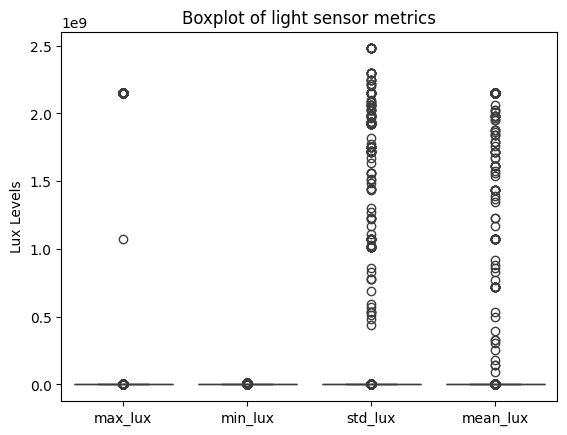

In [25]:
sns.boxplot(data=light_data[['max_lux', 'min_lux', 'std_lux', 'mean_lux']])
plt.title("Boxplot of light sensor metrics")
plt.ylabel("Lux Levels")
plt.show()

Understanding above boxplot

Light data: The box plots confirmed the existence of outliers. It can be thought of as improper calibration of the device meant to measure lux levels. In general lux levels vary in the range 0 to 120000 (1.2 1e9) i.e., no light to sunlight. However this dataset has lux levels varying in 10^9 range, which significantly affects the mentioned std_deviation and mean levels of the measured samples as seen in the boxplot (which appears squashed due to such outliers). We'll either have to cap the max_lux to a certain level based off of the timestamp and number of samples recorded. Based of off timestamp we can determine the outdoor activites and of the number of samples recorded we can determine if the accuracy of the sensors stats increases proportionally.

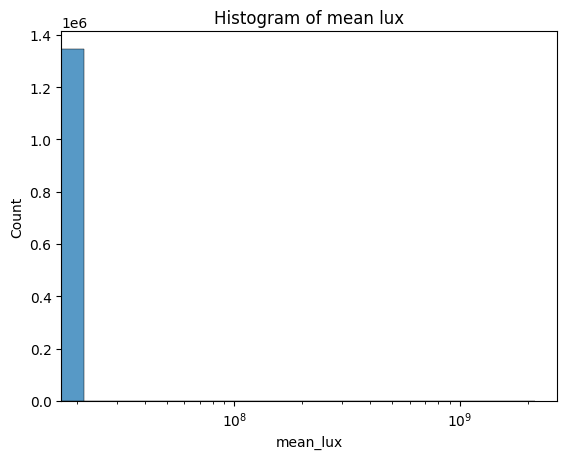

In [26]:
sns.histplot(light_data['mean_lux'], bins=100)
plt.xscale('log')
plt.title("Histogram of mean lux")
plt.show()

In [27]:
print(f"Skewness of mean_decibel: {light_data['mean_lux'].skew()}")
print(f"Kurtosis of mean_decibel: {light_data['mean_lux'].kurtosis()}")

Skewness of mean_decibel: 78.7455500361345
Kurtosis of mean_decibel: 6316.017581690858


We note that the outliers are greater than 10^5. Lux values can only range between 0 and 100,000, with most modern smartphones being able to measure upto 68k or 70k lux at most. Since the application installed on their phone uses their homemade light measurement, along with lux scale for measurement, we must replace the ouliers

In [59]:
q75 = light_data['mean_lux'].quantile(0.75)
q25 = light_data['mean_lux'].quantile(0.25)
iqr = q75-q25
upperbound = q75 + 1.5*iqr
lowerbound = q25 - 1.5*iqr
print(f"Upper Bound: {upperbound}\nQ3: {q75}\nQ1: {q25}\nLower Bound: {lowerbound}")

Upper Bound: 180.0
Q3: 72.0
Q1: 0.0
Lower Bound: -108.0


In [79]:
mean_lux_1 = light_data['mean_lux'].clip(upper = light_data['mean_lux'].quantile(0.999))
mean_lux_1.describe()

count    1.345973e+06
mean     4.832398e+02
std      3.443840e+03
min      0.000000e+00
25%      0.000000e+00
50%      6.125000e+00
75%      7.200000e+01
max      6.821686e+04
Name: mean_lux, dtype: float64

In [80]:
# Applying boxcox transoformation

# Shift data to the right initially
mean_lux_1 = mean_lux_1 + 1
mean_lux_1, lambda_fit = boxcox(mean_lux_1)
mean_lux_1 = mean_lux_1
mean_lux_1 = pd.DataFrame(mean_lux_1, columns=['mean_lux_1'])

In [81]:
print(f"Optimal Lambda: {lambda_fit}")

Optimal Lambda: -0.17802685586796416


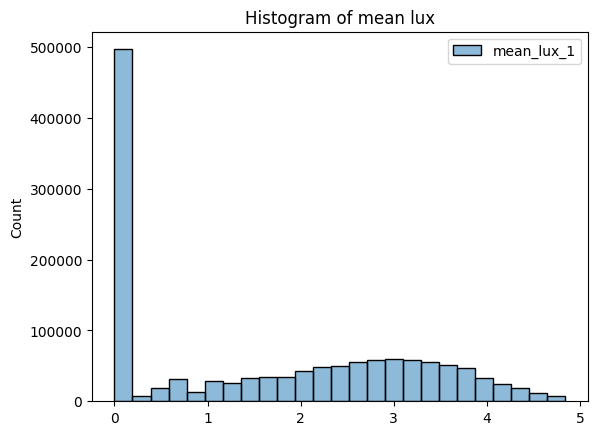

In [82]:
sns.histplot(mean_lux_1, bins=25)
plt.title("Histogram of mean lux")
plt.show()

In [83]:
mean_lux_1.describe()

,mean_lux_1
count,1.345973e+06
mean,1.645249e+00
std,1.513745e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.657124e+00
75%,3.000195e+00
max,4.842756e+00


In [84]:
print(f"Skewness of mean_decibel: {mean_lux_1.skew()}")
print(f"Kurtosis of mean_decibel: {mean_lux_1.kurtosis()}")

Skewness of mean_decibel: mean_lux_1    0.218884
dtype: float64
Kurtosis of mean_decibel: mean_lux_1   -1.433449
dtype: float64


In [85]:
# Dropping unnecessary columns from light_data
light_data.drop(['max_lux', 'min_lux', 'num_samples', 'std_lux'], axis=1, inplace=True)

# Error since it was already removed before

KeyError: "['max_lux', 'min_lux', 'num_samples', 'std_lux'] not found in axis"

In [86]:
# Adding mean_lux_1 as a column to existing dataframe of light_data
light_data['mean_lux_boxcox'] = mean_lux_1

Interpretation of boxcox normalization of mean_lux:

The original data consisted of outliers, way beyond the physical limit of 100k lux. We could originally overcome this in two ways. First, we can cap out the given data to the maximum physical limit. Although all values are pretty important the data is heavily skewed to the right (i.e., 1.2 million datapoints with mean_lux < 1000), which meant that applying any transformation such as min-max or z score would be insignificant. The second way would involve capping the max values using the upper bound from the IQR formula. However in this case we'd lose all important datapoints greater than the upper bound, which is of significant loss to us since differnet values of lux have their own significance.

To overcome this issue we've employed boxcox transformation. It is a normalization transformation formula that is employed to normalize heavily skewed data as in our case. the transformed value depends on the value of optimal lambda based off of some calculation that's related to the skewness and kurtosis of the original data. It then applies this optimal lambda to every datapoint transforming it to a scale starting from 0 to some value. In our case it's from 0 to 5 (considering that the original datapoints are shifted by +1 because box cox works only on positive datapoints). This transformation still holds it significant value and the original value can be obtained by applying the inverseboxcox transformation. 

Any hypothesis testing can employ this normalized distribution directly without losing the original significance.

## Exploring Activity Recognition

## Exploring Connectivity

## Exploring Screen